In [1]:
from sdeconv.deconv import PSFGibsonLanni
from tnia.plotting.projections import show_xyz_max, show_xy_zy_max
from tnia.io.tifffile_helper import open_ij3D
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


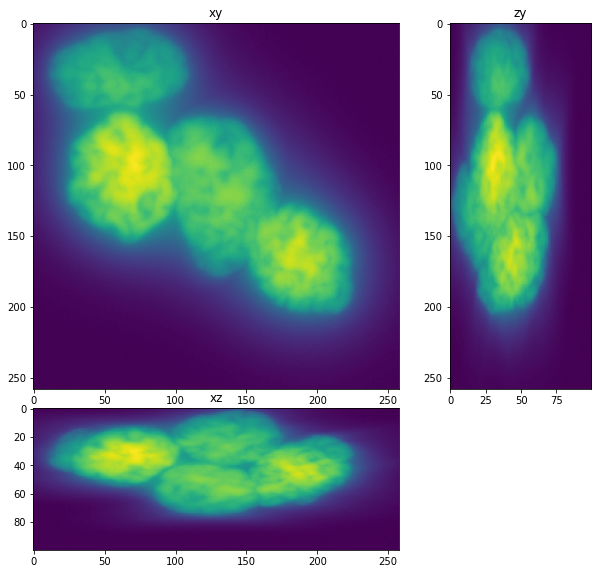

In [2]:
from skimage.io import imread

base_dir ='/home/bnorthan/Images/tnia-python-images/notebooks/'
base_dir =r'D:\images\tnia-python-images\notebooks//'

dir_name=base_dir+'segmentation/nuclei/'

input_name=dir_name+"nuclei1_out_c00_dr90_image.tif" 
input_name=dir_name+"|nuclei4_out_c90_dr10_image.tif"
input_name=dir_name+"nuclei2_out_c90_dr90_image.tif"

im = imread(input_name)

fig = show_xyz_max(im)

Generate PSF with spacings of 124 nm in xy, 300 nm in z, 0.75 NA, 500 nm emission (the reported parameters after resampling in CytoPacq)

In [3]:
gl = PSFGibsonLanni((64,64,64),124,200,0.75,500,150,1,1.3)
psf_124_200 = gl.run()

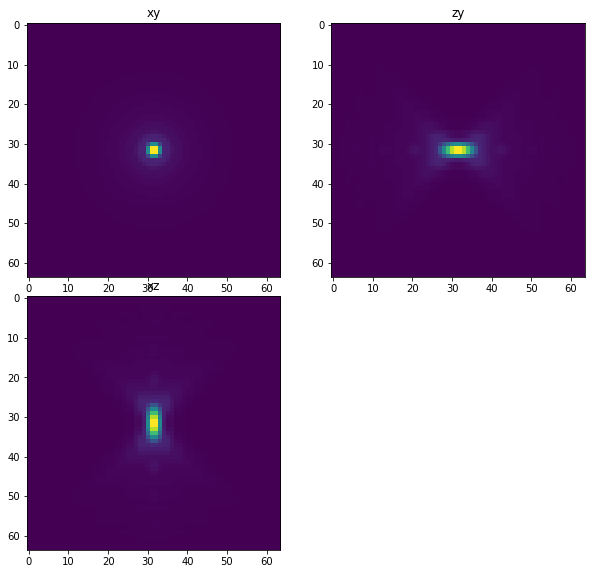

In [4]:
fig=show_xyz_max(psf_124_200)

Generate PSF with spacings of 300 nm in xy, 1400 nm in z, 0.75 NA, 500 nm emission (the undersampled PSF generated with PSF Generator)

In [5]:
#gl = PSFGibsonLanni((64,64,64),300,1400,0.75,500,150, 1,1.33)
#psf_300_1400 = gl.run()

gl = PSFGibsonLanni(im.shape,300,1400,0.75,500,150, 1,1.33)
psf_300_1400 = gl.run()

In [6]:
psf_300_1400 = psf_300_1400/psf_300_1400.sum()

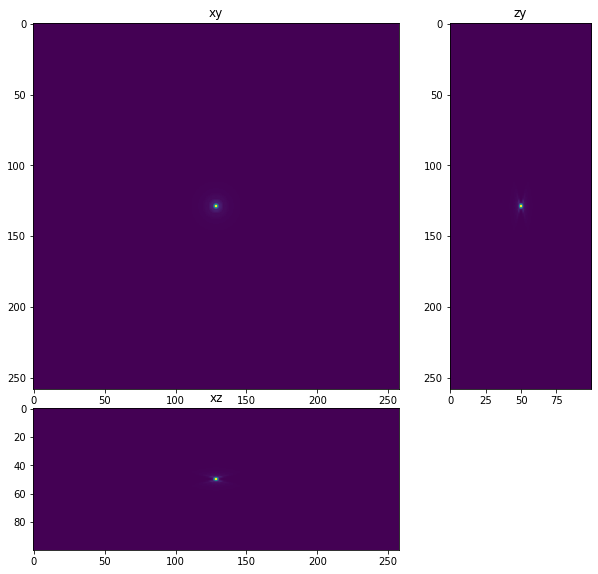

In [7]:
fig=show_xyz_max(psf_300_1400)

In [8]:
import RedLionfishDeconv as rl
#decon_rlf_124_200=rl.doRLDeconvolutionFromNpArrays(im, psf_124_200, niter=400, method='gpu', resAsUint8=False )
import RedLionfishDeconv.RLDeconv3DReiknaOCL as f 
decon_rlf_300_1400_=f.block_RLDeconv3DReiknaOCL4(im, psf_300_1400, niter=400, psfpaddingfract = 0)
#decon_rlf_300_1400=rl.doRLDeconvolutionFromNpArrays(im, psf_300_1400, niter=400, method='gpu', resAsUint8=False )

In [9]:
gl = PSFGibsonLanni(im.shape,300,1400,0.75,500,150, 1,1.33)
psf_300_1400 = gl.run()
import RedLionfishDeconv.RLDeconv3DReiknaOCL as f 
decon_rlf_300_1400_=f.block_RLDeconv3DReiknaOCL4(im, psf_300_1400, niter=400, psfpaddingfract = 0)

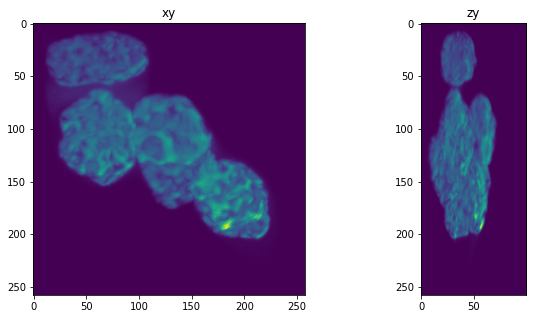

In [10]:
fig=show_xy_zy_max(decon_rlf_300_1400_,figsize=(10,5))

In [11]:
im=im-im.min()+0.00001

In [12]:
gl = PSFGibsonLanni((64,64,64),300,1400,0.75,500,150, 1,1.33)
psf_300_1400 = gl.run()
psf_300_1400 = psf_300_1400/psf_300_1400.sum()

In [13]:
import RedLionfishDeconv.RLDeconv3DReiknaOCL as f 
decon_rlf_300_1400_=f.block_RLDeconv3DReiknaOCL4(im, psf_300_1400, niter=400, psfpaddingfract = 1.5)

In [15]:
num_iterations=400
#decon_clijnc_300_1400=richardson_lucy_nc(im, psf_300_1400, num_iterations, 0)
decon_clij_300_1400, _, _, _=richardson_lucy_nc(im, psf_300_1400, num_iterations, 0)

get lib


In [20]:
decon_clijnc_300_1400=decon_clij_300_1400[0]

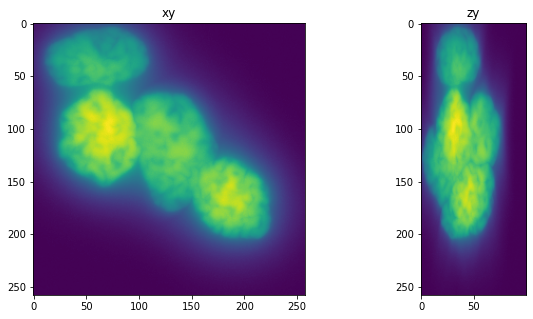

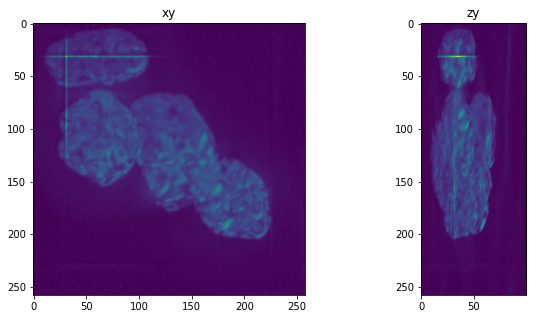

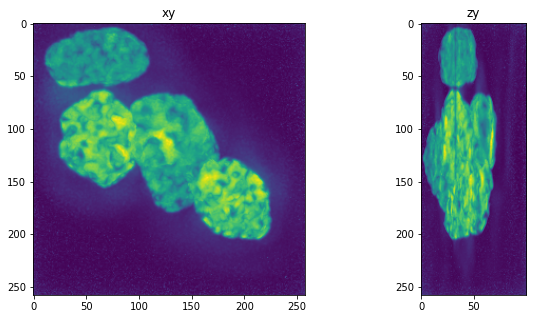

In [22]:
fig=show_xy_zy_max(im,figsize=(10,5))
fig=show_xy_zy_max(decon_rlf_300_1400_,figsize=(10,5))
fig=show_xy_zy_max(decon_clijnc_300_1400,figsize=(10,5))


In [38]:
iter

<function iter>

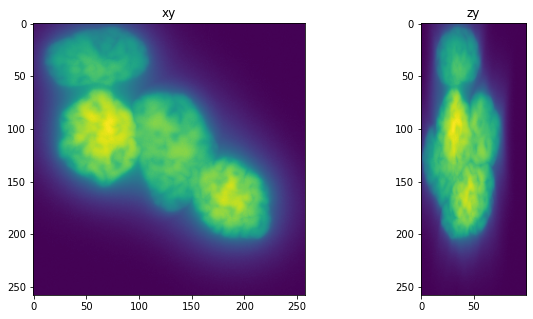

In [65]:
fig=show_xy_zy_max(im,figsize=(10,5))

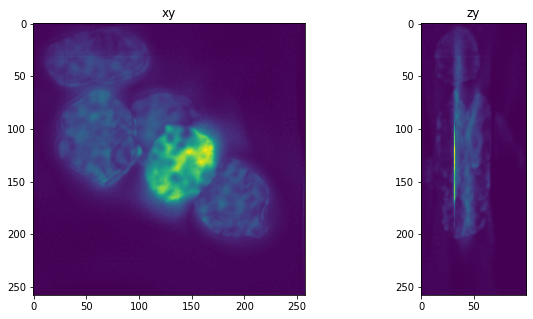

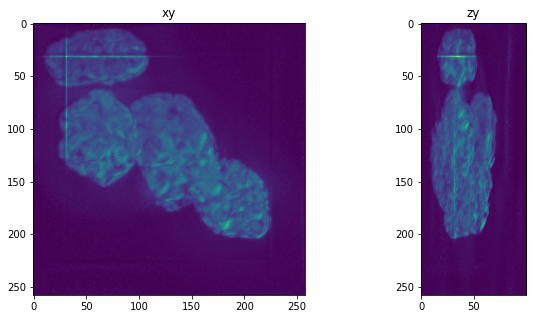

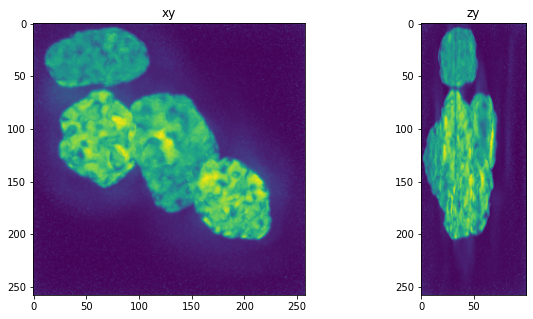

In [62]:
fig=show_xy_zy_max(decon_rlf_124_200,figsize=(10,5))
fig=show_xy_zy_max(decon_rlf_300_1400,figsize=(10,5))
fig=show_xy_zy_max(decon_clijnc_300_1400,figsize=(10,5))

In [64]:
## start napari
import napari
viewer = napari.Viewer()

# show images
viewer.add_image(im, scale = [2,1,1])
viewer.add_image(decon_rlf_124_200, scale = [2,1,1])
#viewer.add_image(decon_rlf_300_1400, scale = [2,1,1])
viewer.add_image(decon_clijnc_300_1400, scale = [2,1,1])

C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\napari_tools_menu\__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\jupyter_client\threaded.py", line 121, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\asyncio\base_events.py", line 618, i

<Image layer 'decon_clijnc_300_1400' at 0x1dfeffc3040>